<a id = 'toc'></a>
# Table of contents

- ### [5.2 Решающие деревья](#5.2)


[UP](#toc)

<a id = '5.2'></a>
# 5.2 Решающие деревья

## Решающие деревья для задачи классификации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [22]:
df = pd.read_csv('Upload/5.2.bill.csv')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y
                                                    , test_size = .2
                                                    , random_state = 17)

model = DecisionTreeClassifier(max_depth = 3
                              , max_features = 2
                              , random_state = 17)
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

f1_score_train = f1_score(y_pred_train, y_train)
f1_score_test = f1_score(y_pred_test, y_test)

print(f'[train] F1-Score: {f1_score_train:.2f}')
print(f'[test] F1-Score: {f1_score_test:.2f}')

[train] F1-Score: 0.90
[test] F1-Score: 0.87


#### Использование параметров решающего дерева на маленькой выборке 
Изменено кол-ве минимально-допустимых листьев дерева

In [21]:
model_new = DecisionTreeClassifier(max_depth = 3
                                  , max_features = 2
                                  , min_samples_leaf = 4
                                  , random_state = 17)

model_new.fit(x_train, y_train)

y_pred_train = model_new.predict(x_train)
y_pred_test = model_new.predict(x_test)

f1_score_train = f1_score(y_pred_train, y_train)
f1_score_test = f1_score(y_pred_test, y_test)

x_new = [[2.04378,-0.38422,1.437292,0.76421]]
y_new = model_new.predict(x_new)

print(f'[train] F1-Score: {f1_score_train:.2f}')
print(f'[test] F1-Score: {f1_score_test:.2f}')
print(f'[new] : {y_new}')

[train] F1-Score: 0.90
[test] F1-Score: 0.87
[new] : [0]


### Проверка MSE

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Upload/5.2.petrol.csv')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y
                                                    , test_size = .3
                                                    , random_state = 42)

model = DecisionTreeRegressor(random_state = 42)
model.fit(x_train, y_train)

#y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#rmse_train = np.sqrt(mean_squared_error(y_pred_train, y_train))
rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test))

#print(f'[train] RMSE: {rmse_train:.2f}, max_depth: {model.tree_.max_depth}')
print(f'[test] RMSE: {rmse_test:.2f}, max_depth: {model.tree_.max_depth}')

[test] RMSE: 87.97, max_depth: 11


[UP](#toc)

<a id = '5.4'></a>
# 5.4 Решающие деревья

In [112]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree
from sklearn.datasets import make_classification

import numpy as np

In [113]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Генерация данных

In [114]:
classification_problem = datasets.make_classification(n_features = 2
                                                      , n_informative = 2, 
                                                      n_classes = 3
                                                      , n_redundant=0
                                                      , n_clusters_per_class=1
                                                      , random_state=3)

In [115]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

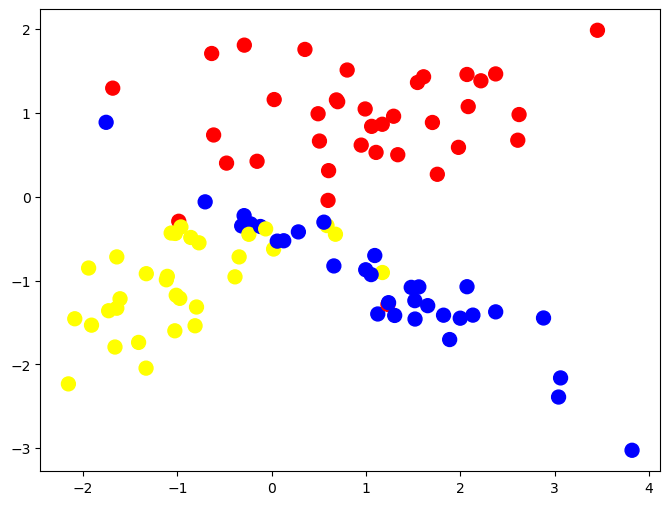

In [116]:
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0]
                       , classification_problem[0]))
              , list(map(lambda x: x[1]
                         , classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)


In [117]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                 classification_problem[1], 
                                                 test_size = 0.3,
                                                 random_state = 1)

## Модель DecisionTreeClassifier

In [118]:
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_labels)

predictions = clf.predict(test_data)
print(f'Accuracy: {round(accuracy_score(test_labels, predictions), 2)}')

predictions

Accuracy: 0.77


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0])

## Разделяющая поверхность

### Легкий пример для понимания работы np + matplotlib

In [119]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step)
                       , np.arange(y_min, y_max, step))

In [120]:
def plot_decision_surface(estimator, train_data, train_labels
                          , test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()]
                                                 )).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1]
                   , c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(
        metrics.accuracy_score(train_labels
                               , estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1]
                   , c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(
        metrics.accuracy_score(test_labels, estimator.predict(test_data))))

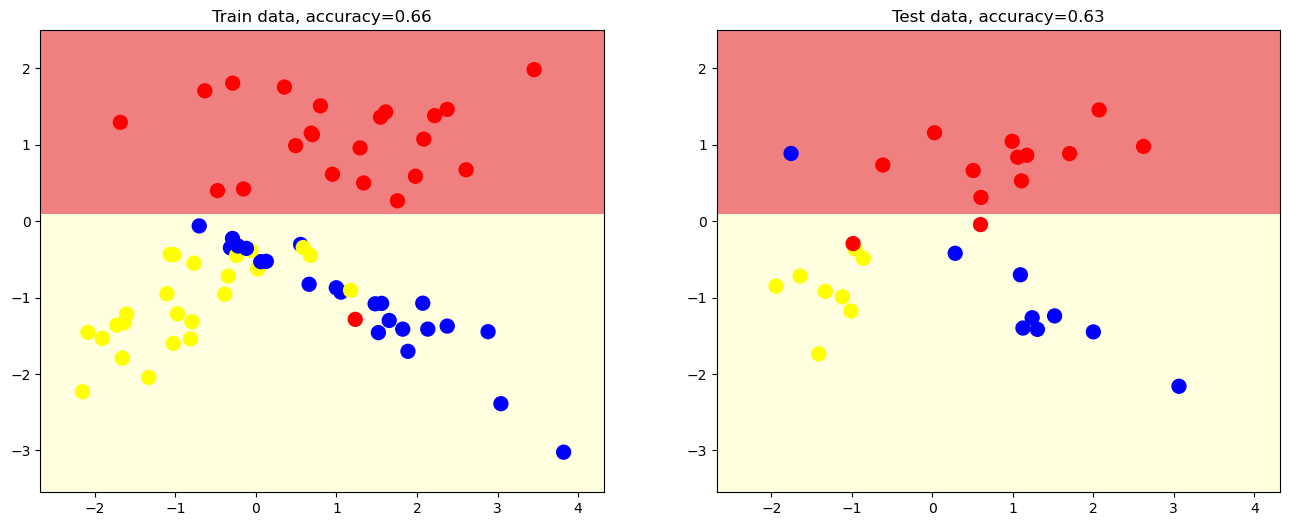

In [121]:
clf = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

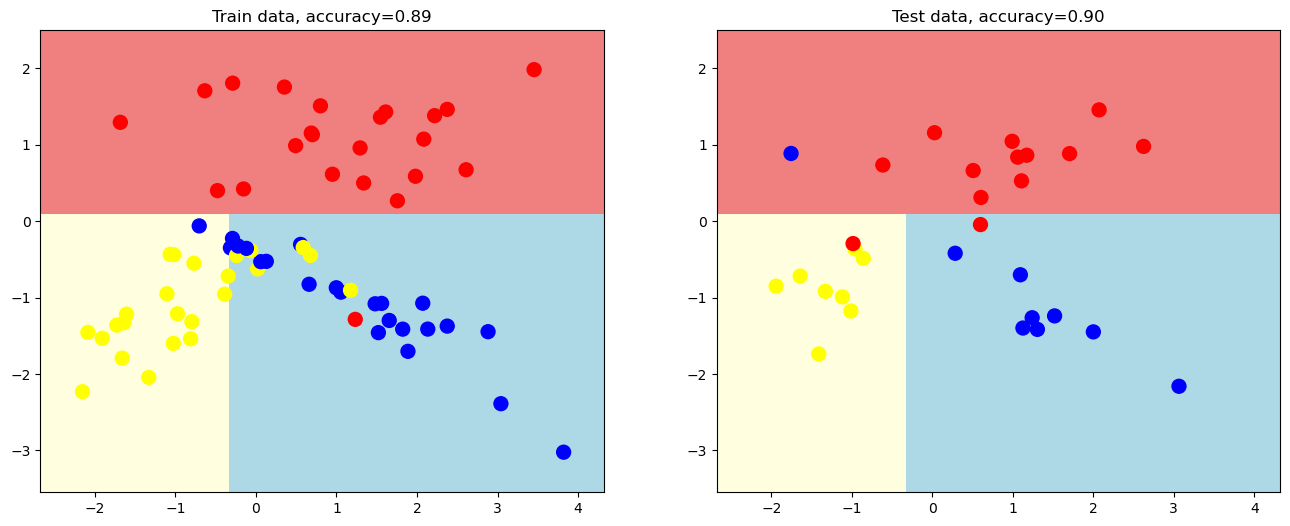

In [122]:
clf = tree.DecisionTreeClassifier(random_state = 1, max_depth = 2)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

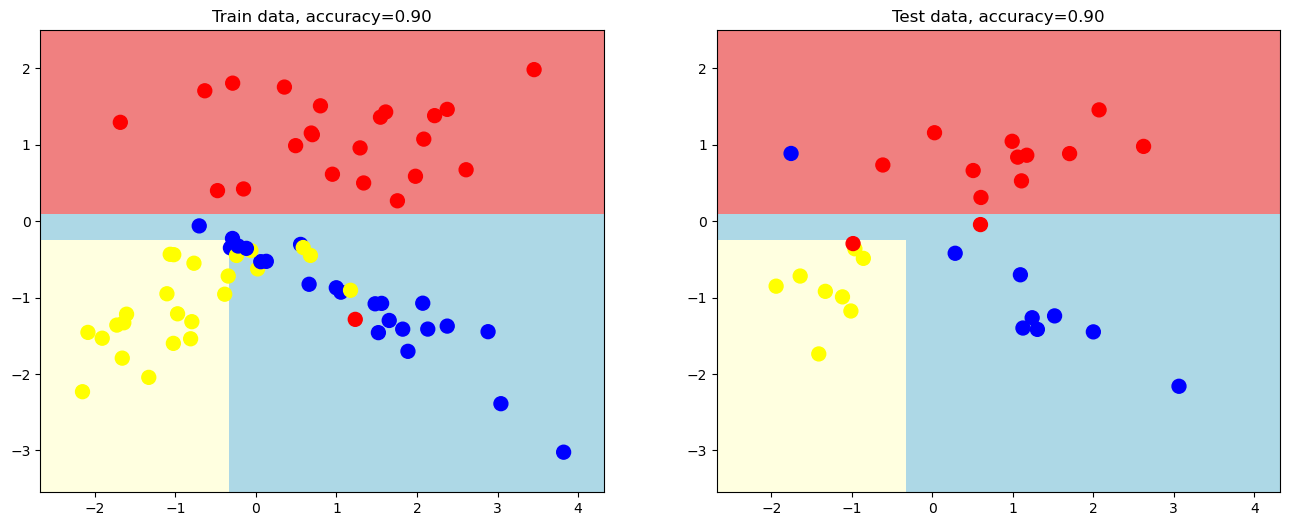

In [123]:
clf = tree.DecisionTreeClassifier(random_state = 1, max_depth = 3)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

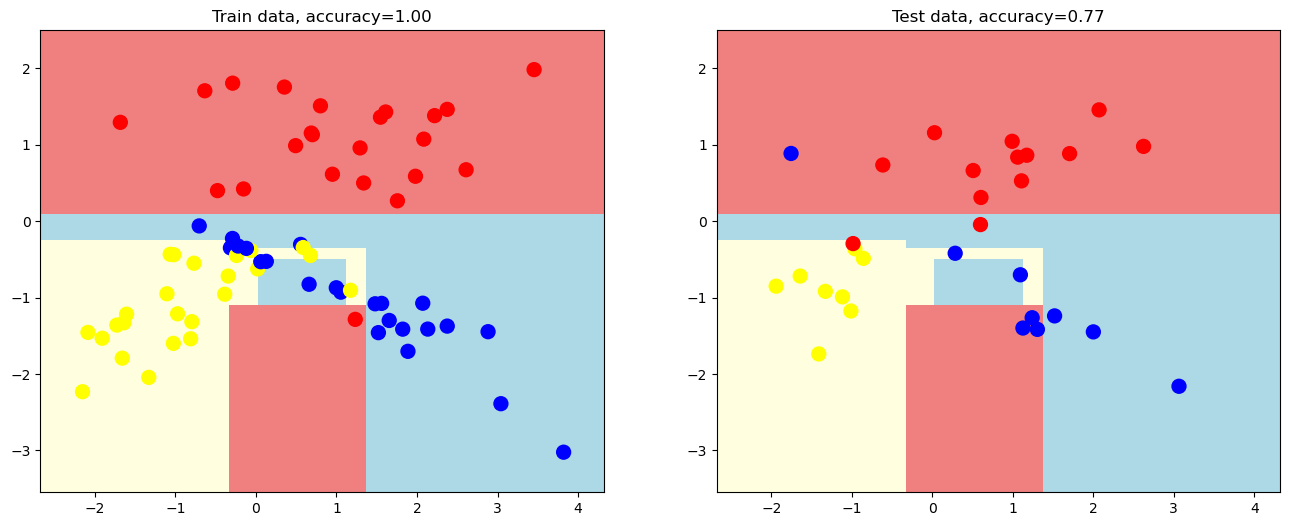

In [124]:
clf = tree.DecisionTreeClassifier(random_state = 1)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

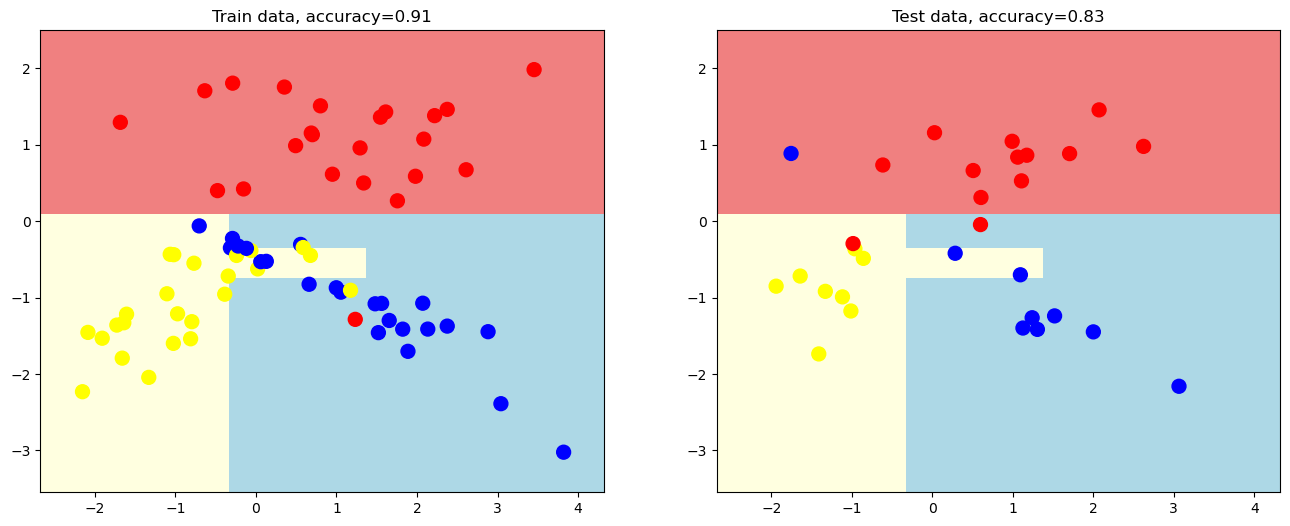

In [130]:
clf = tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 4)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

[UP](#toc)

In [3]:
from sklearn import model_selection, datasets, metrics, tree
import pandas as pd
import numpy as np